In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [2]:
df = pd.read_csv('Datoscompletos3.csv',sep=";",parse_dates=[10],dayfirst=True)

In [3]:
df.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,canal,cpais_id,descuento,genero,provincia,tarifa,tipo_servicio,fecha_venta,familia,precio
0,1,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
1,2,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
2,3,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
3,4,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
4,5,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35


In [4]:
tipo_servicio=(df.groupby(['tipo_servicio','Día de semana de fecha_venta','Hora de turno','fecha_venta'])['tipo_servicio'].count().reset_index(name='total'))

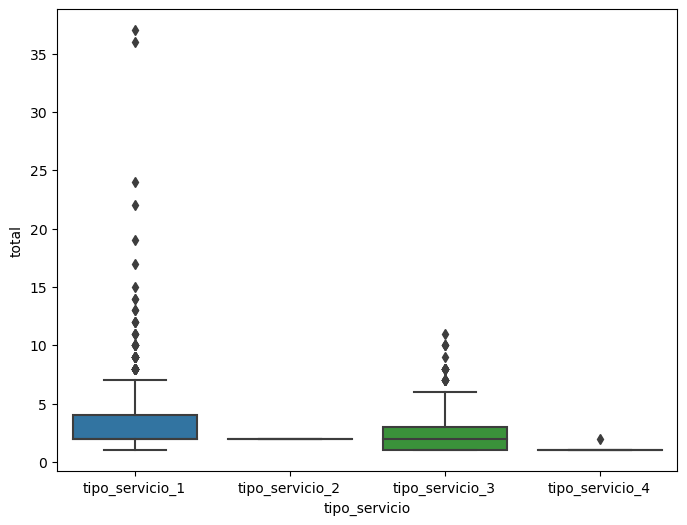

In [5]:
data = pd.concat([tipo_servicio['tipo_servicio'], tipo_servicio['total']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='tipo_servicio', y='total', data=data)

In [6]:
# Podemos ver las relaciones y que el baño y masaje35 tiene mas registros(y masaje35 es mas constante por dias) mientras que baño mas masaje tradicional y masaje60 minutos es mas residual 

In [7]:
precio_final_df=df
precio_final_df['precio_final'] = precio_final_df['precio'] * (1+(precio_final_df['descuento']/100))

In [8]:
precio_final_df

,id_reserva,Día de semana de fecha_venta,Hora de turno,canal,cpais_id,descuento,genero,provincia,tarifa,tipo_servicio,fecha_venta,familia,precio,precio_final
0,1,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
1,2,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
2,3,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
3,4,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
4,5,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,8025,jueves,16,canal_3,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_3,2020-12-31,familia_1,35,35.0
7898,8026,jueves,16,canal_3,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_3,2020-12-31,familia_1,35,35.0
7899,8027,jueves,12,canal_3,Pais_1,20,H,PROVINCIA_1,tarifa_3,tipo_servicio_3,2020-12-31,familia_1,35,42.0
7900,8028,jueves,20,canal_3,Pais_1,20,H,PROVINCIA_1,tarifa_3,tipo_servicio_3,2020-12-31,familia_1,35,42.0


In [9]:
precio_final_df['Year']=precio_final_df['fecha_venta'].dt.year
precio_final_df['Mes']=precio_final_df['fecha_venta'].dt.month
precio_final_df['Semana']=precio_final_df['fecha_venta'].dt.week
precio_final_df['Dia']=precio_final_df['fecha_venta'].dt.day

one_hot_encoded_data = pd.get_dummies(precio_final_df, columns = ['descuento', 'genero','familia','tipo_servicio','tarifa','canal'])


C:\Users\usuario\AppData\Local\Temp\ipykernel_7324\1875402781.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  precio_final_df['Semana']=precio_final_df['fecha_venta'].dt.week


In [10]:
one_hot_encoded_data.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,cpais_id,provincia,fecha_venta,precio,precio_final,Year,Mes,...,tipo_servicio_tipo_servicio_2,tipo_servicio_tipo_servicio_3,tipo_servicio_tipo_servicio_4,tarifa_tarifa_1,tarifa_tarifa_2,tarifa_tarifa_3,tarifa_tarifa_4,canal_canal_1,canal_canal_2,canal_canal_3
0,1,miércoles,20,Pais_1,PROVINCIA_1,2020-01-01,35,35.0,2020,1,...,0,0,0,1,0,0,0,1,0,0
1,2,miércoles,20,Pais_1,PROVINCIA_1,2020-01-01,35,35.0,2020,1,...,0,0,0,1,0,0,0,1,0,0
2,3,miércoles,20,Pais_1,PROVINCIA_1,2020-01-01,35,35.0,2020,1,...,0,0,0,1,0,0,0,0,1,0
3,4,miércoles,20,Pais_1,PROVINCIA_1,2020-01-01,35,35.0,2020,1,...,0,0,0,1,0,0,0,0,1,0
4,5,miércoles,20,Pais_1,PROVINCIA_1,2020-01-01,35,35.0,2020,1,...,0,0,0,1,0,0,0,0,1,0


In [11]:
one_hot_encoded_data_2017= one_hot_encoded_data.where(one_hot_encoded_data['Year']==2017)
one_hot_encoded_data_2018= one_hot_encoded_data.where(one_hot_encoded_data['Year']==2018)
one_hot_encoded_data_2019= one_hot_encoded_data.where(one_hot_encoded_data['Year']==2019)
one_hot_encoded_data_2020= one_hot_encoded_data.where(one_hot_encoded_data['Year']==2020)
one_hot_encoded_data_2021= one_hot_encoded_data.where(one_hot_encoded_data['Year']==2021)
one_hot_encoded_data_2021=one_hot_encoded_data_2021.dropna()

In [12]:
one_hot_encoded_data_2021

,id_reserva,Día de semana de fecha_venta,Hora de turno,cpais_id,provincia,fecha_venta,precio,precio_final,Year,Mes,...,tipo_servicio_tipo_servicio_2,tipo_servicio_tipo_servicio_3,tipo_servicio_tipo_servicio_4,tarifa_tarifa_1,tarifa_tarifa_2,tarifa_tarifa_3,tarifa_tarifa_4,canal_canal_1,canal_canal_2,canal_canal_3
5,6.0,viernes,20.0,Pais_1,PROVINCIA_2,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,8011.0,domingo,10.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,35.0,2021.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7884,8012.0,domingo,12.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,42.0,2021.0,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7885,8013.0,domingo,12.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,42.0,2021.0,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7886,8014.0,domingo,16.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,35.0,2021.0,10.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
ventas_por_semana = one_hot_encoded_data.set_index('fecha_venta')['id_reserva'].resample('W').nunique().reset_index(name='total')

In [14]:
ventas_por_semana.head()

,fecha_venta,total
0,2017-01-08,1
1,2017-01-15,1
2,2017-01-22,4
3,2017-01-29,3
4,2017-02-05,0


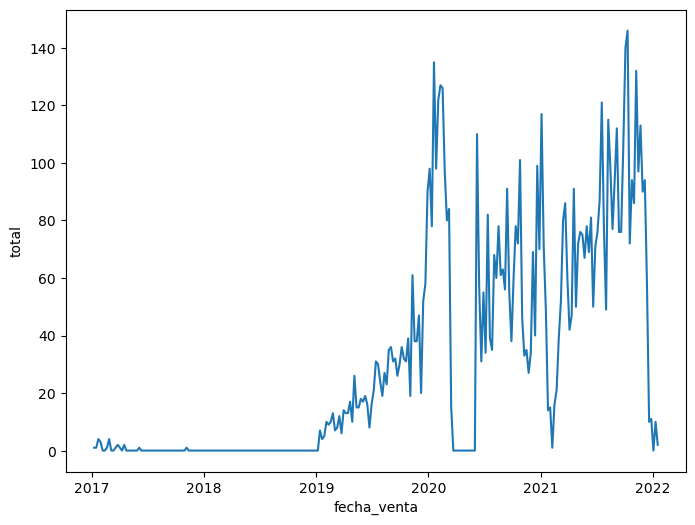

In [15]:
data = pd.concat([ventas_por_semana['fecha_venta'], ventas_por_semana['total']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.lineplot(x='fecha_venta', y="total", data=data)

In [16]:
ventas_por_mes = precio_final_df.set_index('fecha_venta')['id_reserva'].resample('M').nunique().reset_index(name='total')

In [17]:
ventas_por_mes.head()

,fecha_venta,total
0,2017-01-31,9
1,2017-02-28,5
2,2017-03-31,4
3,2017-04-30,2
4,2017-05-31,1


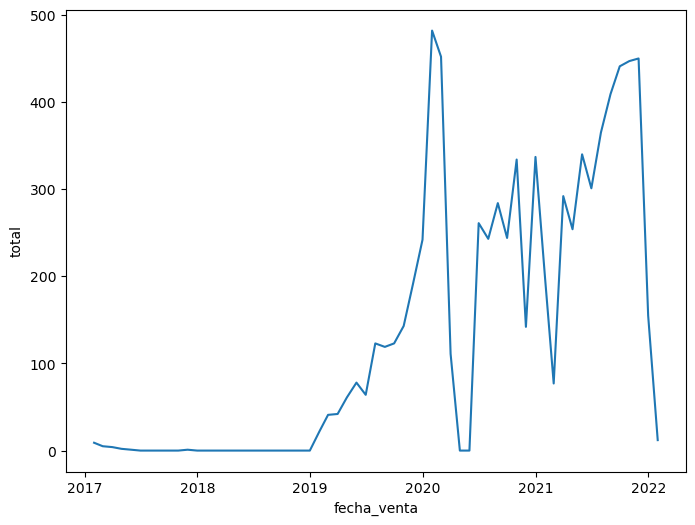

In [18]:
data = pd.concat([ventas_por_mes['fecha_venta'], ventas_por_mes['total']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.lineplot(x='fecha_venta', y="total", data=data)

In [19]:
df_semanal=precio_final_df.groupby(['fecha_venta','tipo_servicio','Semana','Year'])['id_reserva'].count().reset_index(name='total')
df_semanal_2017= df_semanal.where(df_semanal['Year']==2017)
df_semanal_2018= df_semanal.where(df_semanal['Year']==2018)
df_semanal_2019= df_semanal.where(df_semanal['Year']==2019)
df_semanal_2020= df_semanal.where(df_semanal['Year']==2020)
df_semanal_2021= df_semanal.where(df_semanal['Year']==2021)


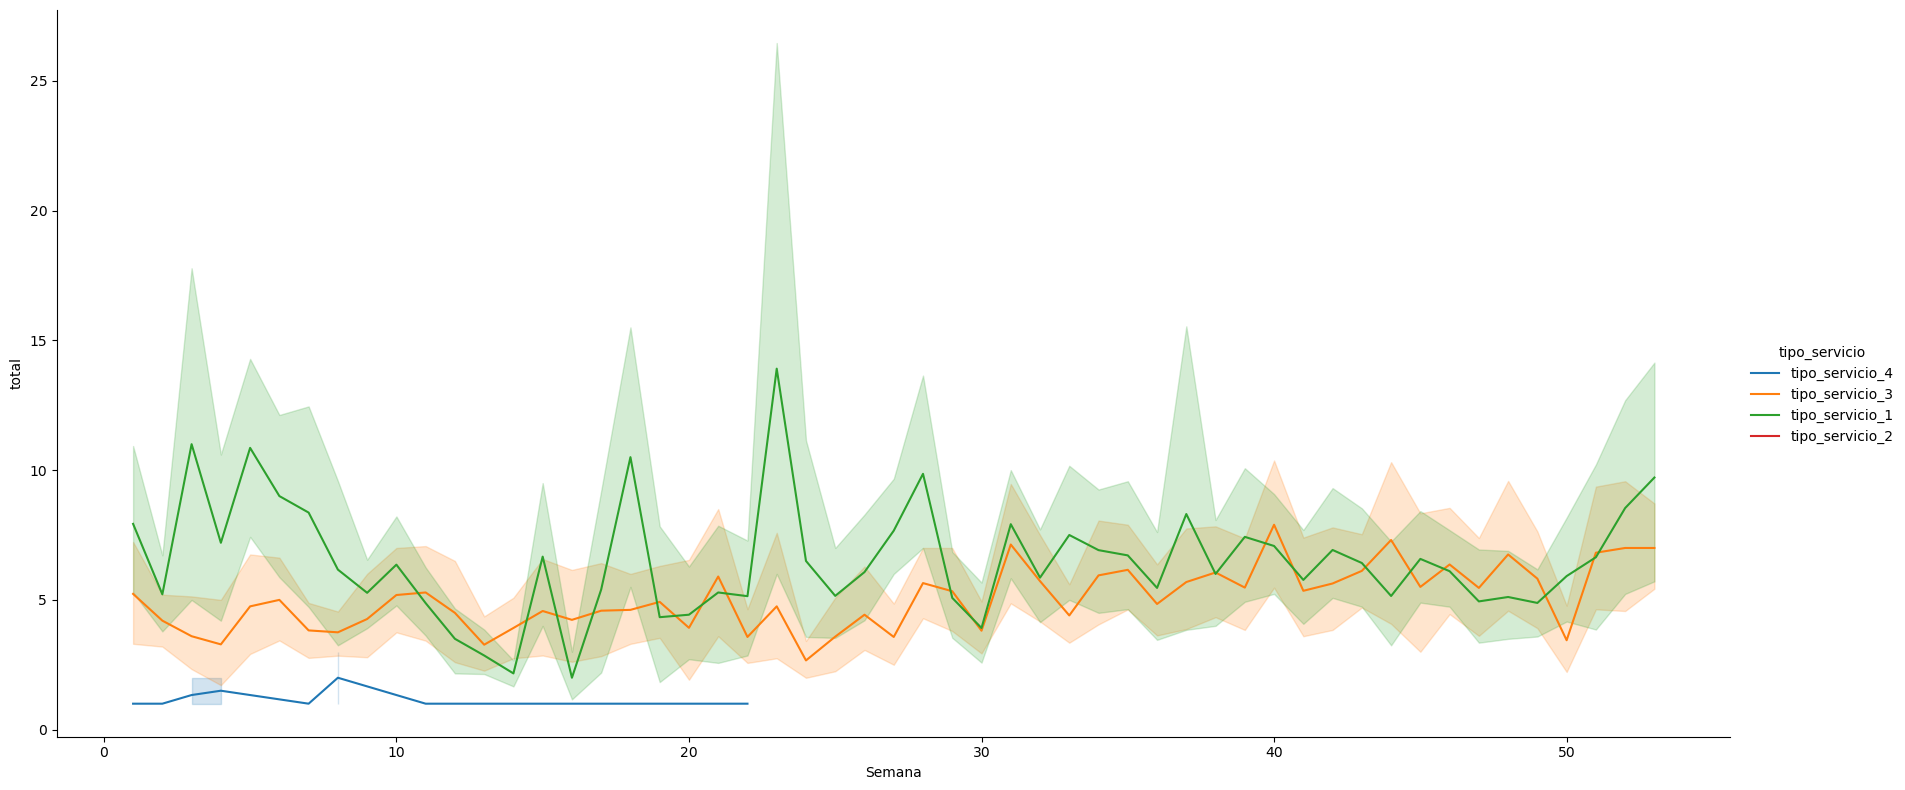

In [20]:
data = pd.concat([df_semanal['Semana'], df_semanal['total'],df_semanal['tipo_servicio']], axis=1)
sns.relplot(x='Semana', y="total", data=data, hue='tipo_servicio',kind='line',height=8, aspect=2.2)


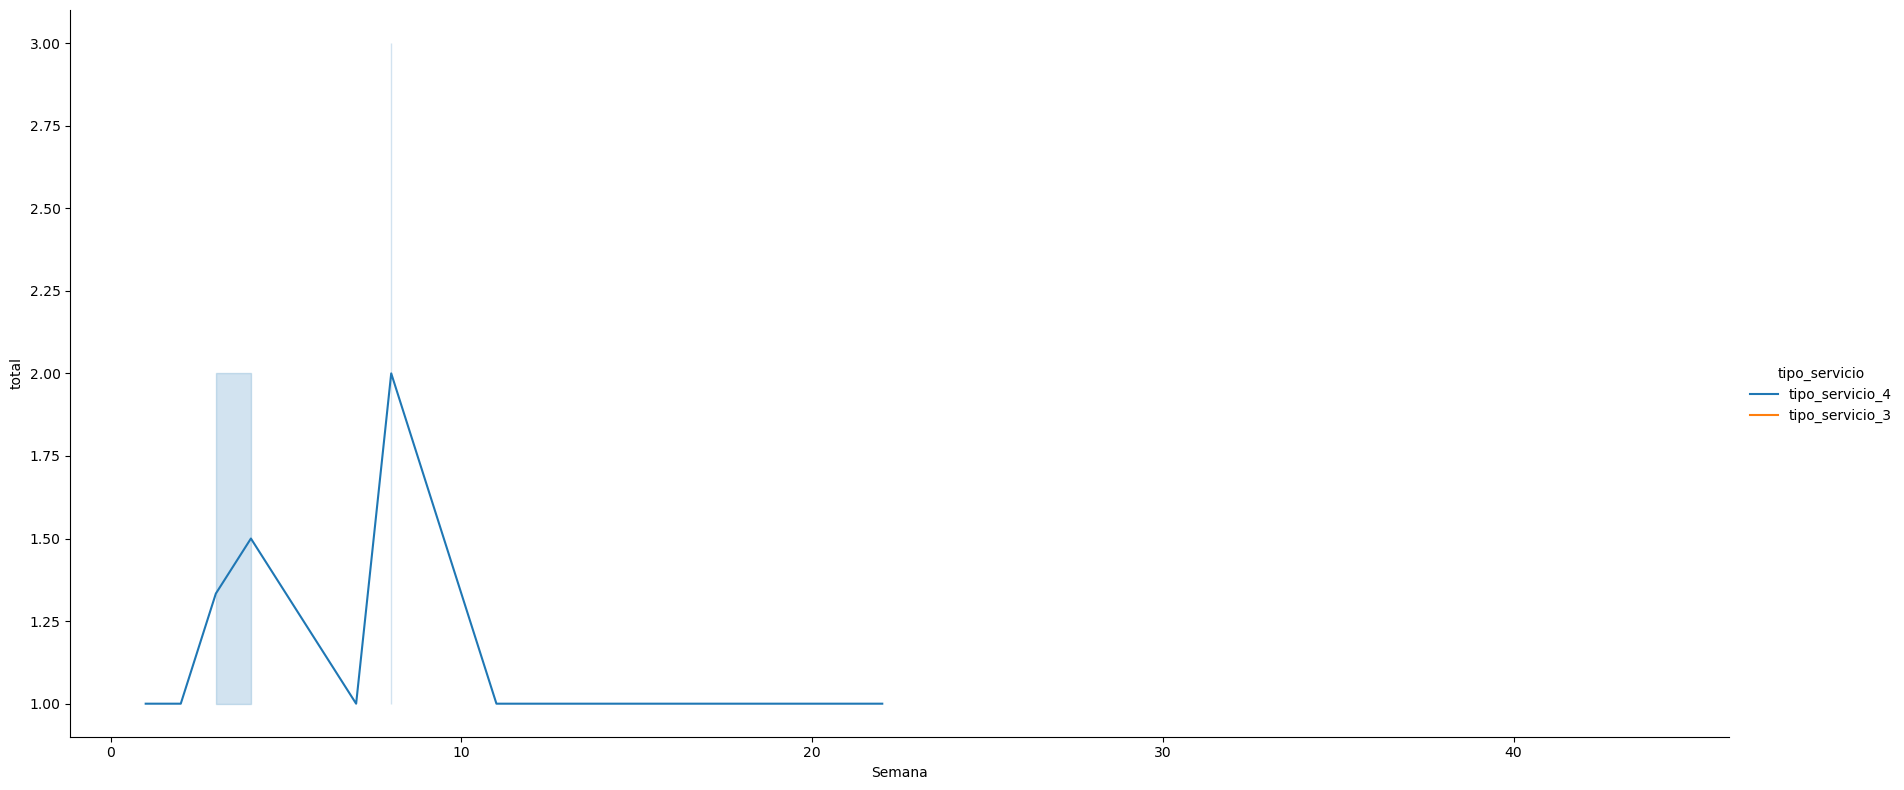

In [21]:
data = pd.concat([df_semanal_2017['Semana'], df_semanal_2017['total'],df_semanal_2017['tipo_servicio']], axis=1)
sns.relplot(x='Semana', y="total", data=data, hue='tipo_servicio',kind='line',height=8, aspect=2.2)

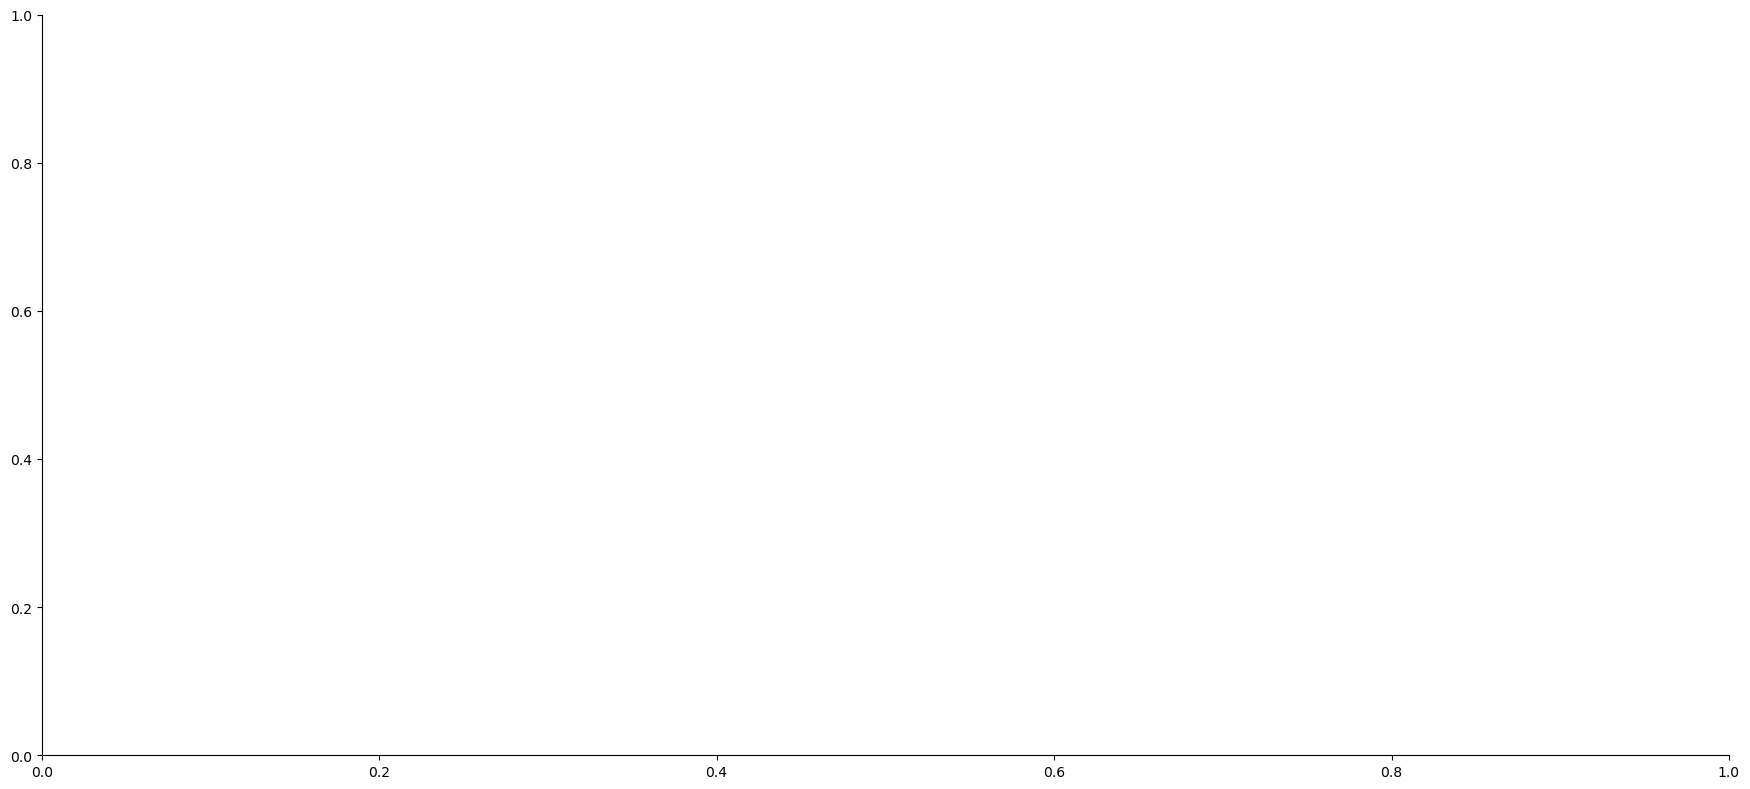

In [22]:
data = pd.concat([df_semanal_2018['Semana'], df_semanal_2018['total'],df_semanal_2018['tipo_servicio']], axis=1)
sns.relplot(x='Semana', y="total", data=data, hue='tipo_servicio',kind='line',height=8, aspect=2.2)

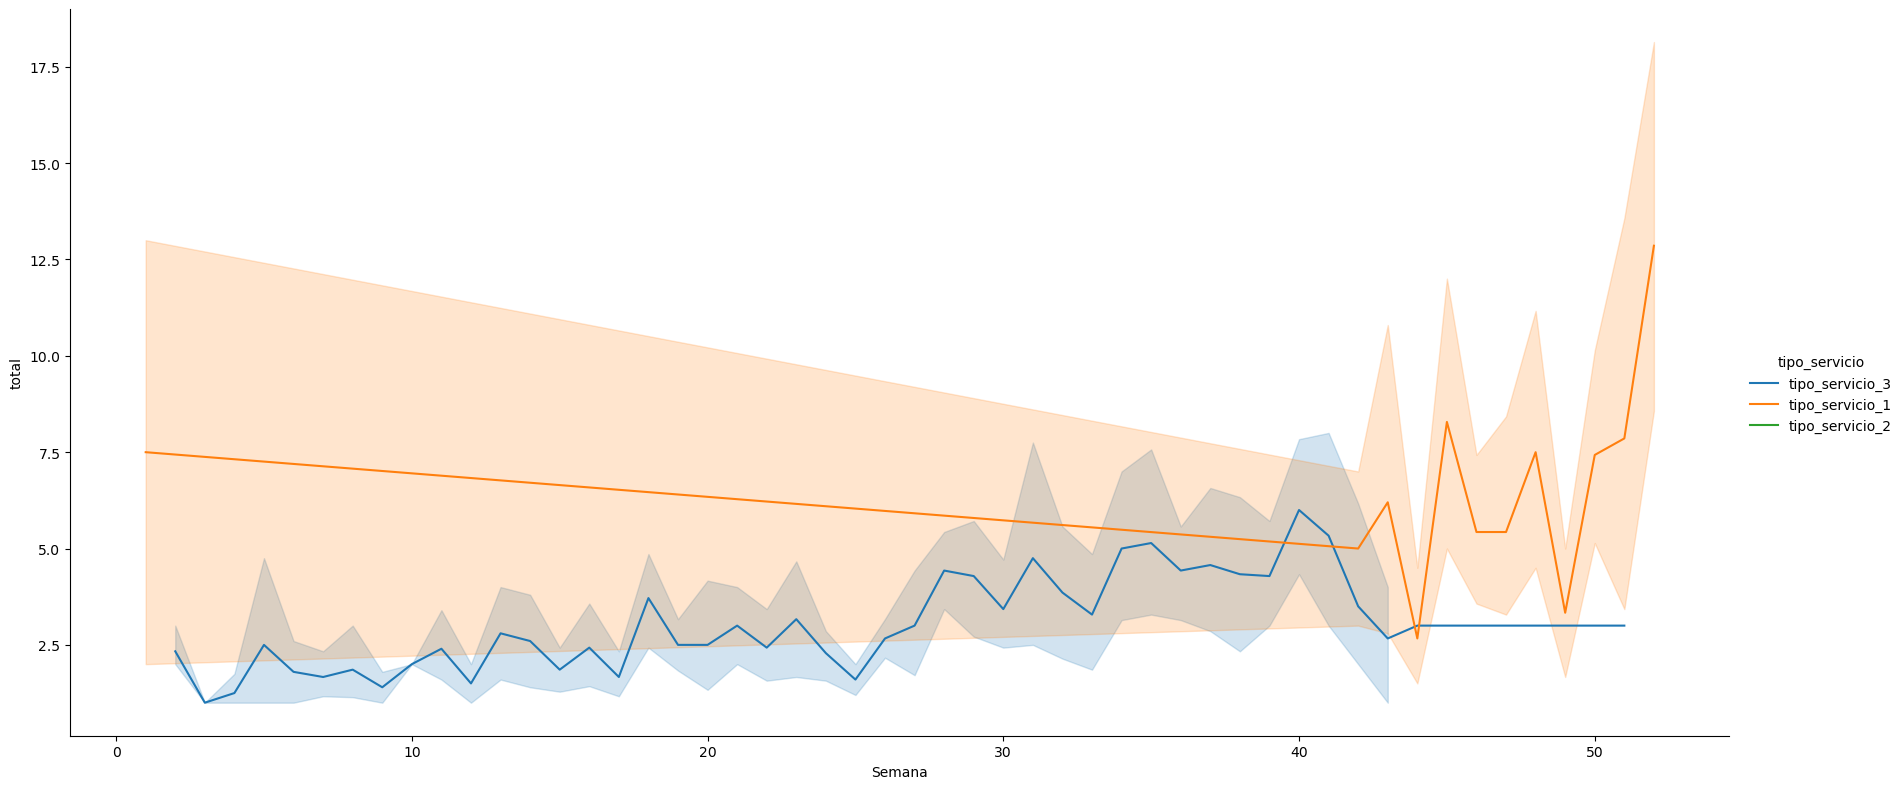

In [23]:
data = pd.concat([df_semanal_2019['Semana'], df_semanal_2019['total'],df_semanal_2019['tipo_servicio']], axis=1)
sns.relplot(x='Semana', y="total", data=data, hue='tipo_servicio',kind='line',height=8, aspect=2.2)

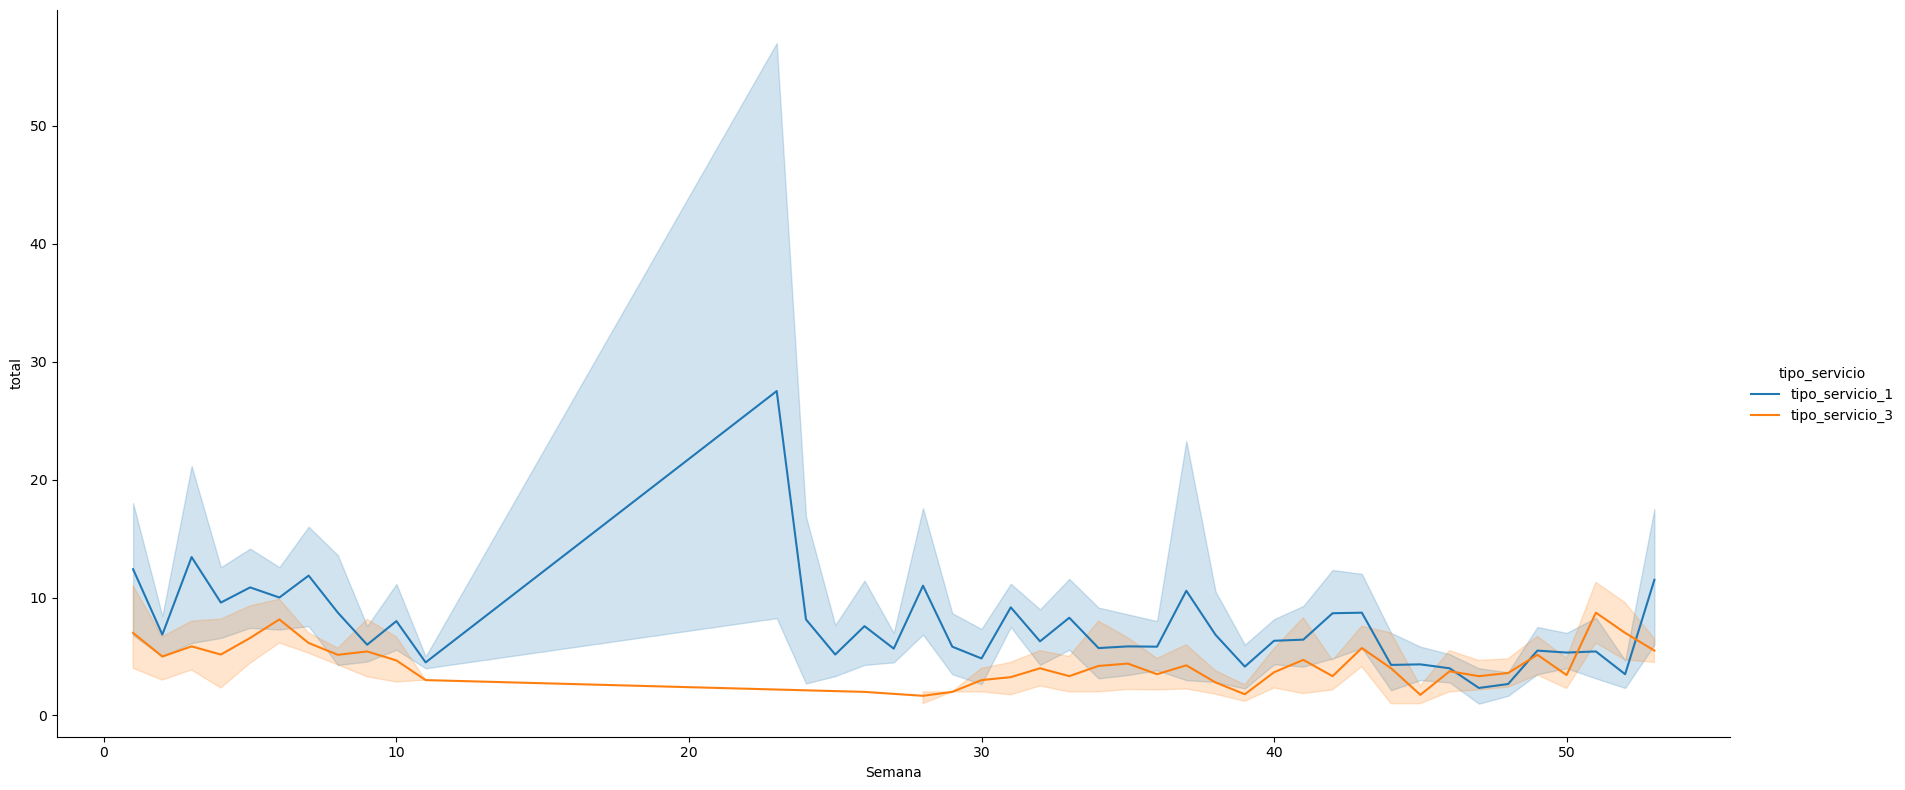

In [24]:
data = pd.concat([df_semanal_2020['Semana'], df_semanal_2020['total'],df_semanal_2020['tipo_servicio']], axis=1)
sns.relplot(x='Semana', y="total", data=data, hue='tipo_servicio',kind='line',height=8, aspect=2.2)

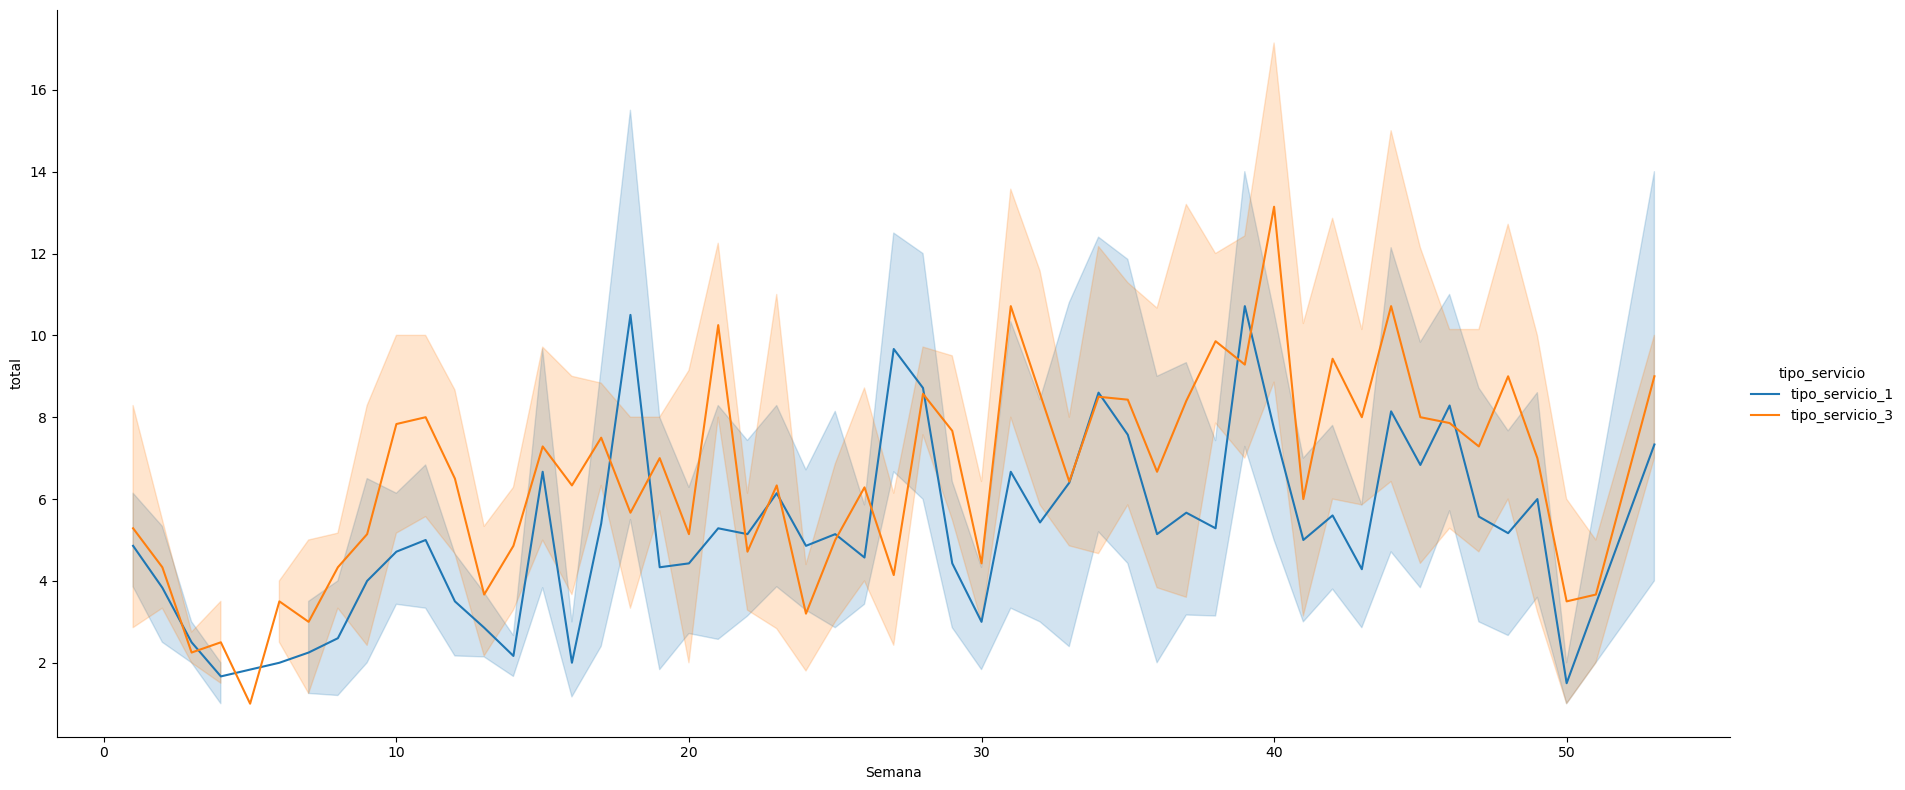

In [25]:
data = pd.concat([df_semanal_2021['Semana'], df_semanal_2021['total'],df_semanal_2021['tipo_servicio']], axis=1)
sns.relplot(x='Semana', y="total", data=data, hue='tipo_servicio',kind='line',height=8, aspect=2.2)

In [26]:
descuentos_media_df = one_hot_encoded_data_2021[['Semana','descuento_0','descuento_20','descuento_25']].groupby(['Semana']).mean().reset_index()
descuentos_media_df.shape
one_hot_encoded_data_2021.dropna( inplace=True )
one_hot_encoded_data_2021


,id_reserva,Día de semana de fecha_venta,Hora de turno,cpais_id,provincia,fecha_venta,precio,precio_final,Year,Mes,...,tipo_servicio_tipo_servicio_2,tipo_servicio_tipo_servicio_3,tipo_servicio_tipo_servicio_4,tarifa_tarifa_1,tarifa_tarifa_2,tarifa_tarifa_3,tarifa_tarifa_4,canal_canal_1,canal_canal_2,canal_canal_3
5,6.0,viernes,20.0,Pais_1,PROVINCIA_2,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,8011.0,domingo,10.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,35.0,2021.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7884,8012.0,domingo,12.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,42.0,2021.0,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7885,8013.0,domingo,12.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,42.0,2021.0,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7886,8014.0,domingo,16.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,35.0,2021.0,10.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
descuentos_media_df

,Semana,descuento_0,descuento_20,descuento_25
0,1.0,0.563380,0.295775,0.140845
1,2.0,0.469388,0.285714,0.244898
2,3.0,0.357143,0.571429,0.071429
3,4.0,0.333333,0.600000,0.066667
4,5.0,1.000000,0.000000,0.000000
5,6.0,0.125000,0.625000,0.250000
6,7.0,0.476190,0.333333,0.190476
7,8.0,0.333333,0.487179,0.179487
8,9.0,0.423077,0.326923,0.250000
9,10.0,0.512500,0.337500,0.150000


In [28]:
descuentos_media_df.head()

,Semana,descuento_0,descuento_20,descuento_25
0,1.0,0.563380,0.295775,0.140845
1,2.0,0.469388,0.285714,0.244898
2,3.0,0.357143,0.571429,0.071429
3,4.0,0.333333,0.600000,0.066667
4,5.0,1.000000,0.000000,0.000000


In [29]:
descuentos_sum_df = one_hot_encoded_data_2021[['Semana','descuento_0','descuento_20','descuento_25']].groupby(['Semana']).sum().reset_index()
descuentos_sum_df

,Semana,descuento_0,descuento_20,descuento_25
0,1.0,40.0,21.0,10.0
1,2.0,23.0,14.0,12.0
2,3.0,5.0,8.0,1.0
3,4.0,5.0,9.0,1.0
4,5.0,1.0,0.0,0.0
5,6.0,2.0,10.0,4.0
6,7.0,10.0,7.0,4.0
7,8.0,13.0,19.0,7.0
8,9.0,22.0,17.0,13.0
9,10.0,41.0,27.0,12.0


In [30]:
descuentos_sum_df.head()

,Semana,descuento_0,descuento_20,descuento_25
0,1.0,40.0,21.0,10.0
1,2.0,23.0,14.0,12.0
2,3.0,5.0,8.0,1.0
3,4.0,5.0,9.0,1.0
4,5.0,1.0,0.0,0.0


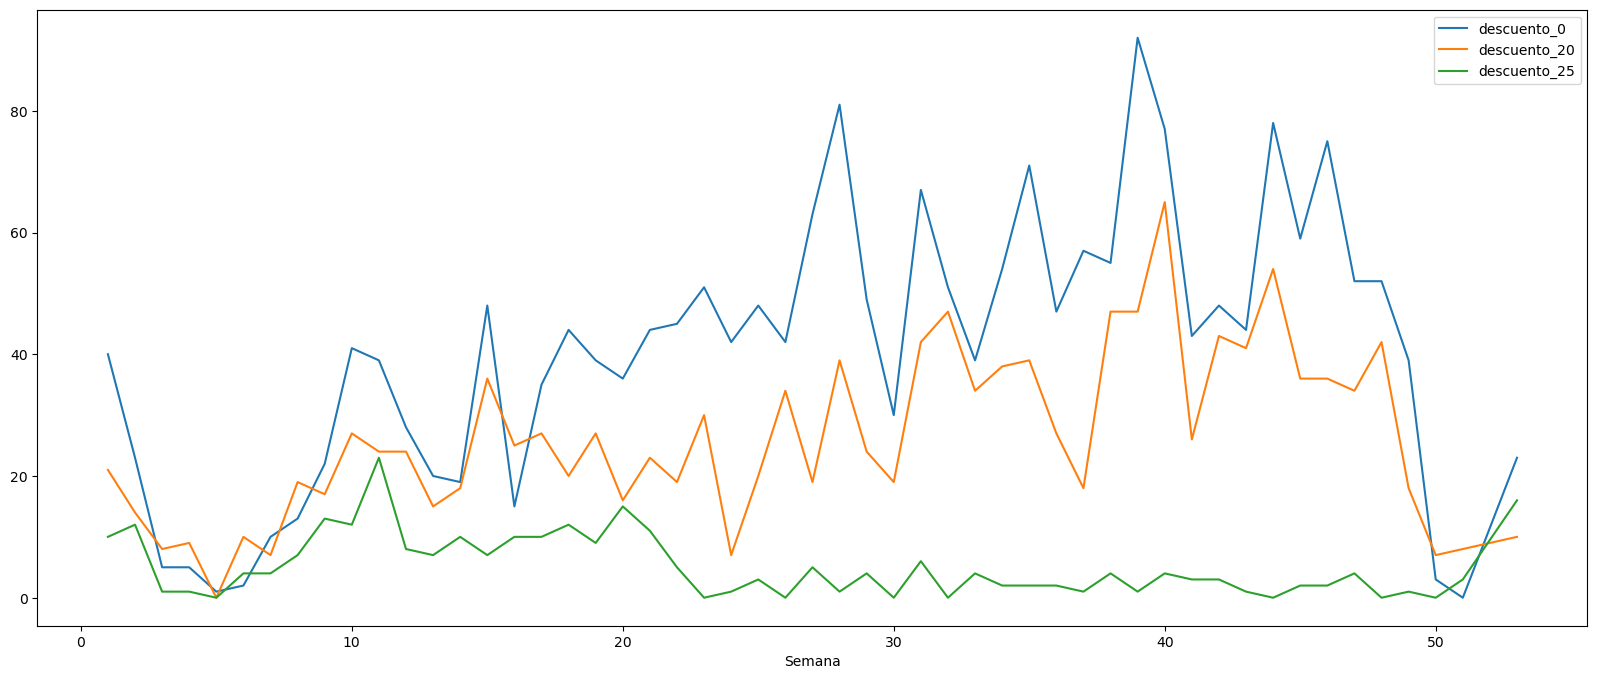

In [31]:
descuentos_sum_df.plot(x="Semana",figsize=(20,8))

In [32]:
one_hot_encoded_data_2021


,id_reserva,Día de semana de fecha_venta,Hora de turno,cpais_id,provincia,fecha_venta,precio,precio_final,Year,Mes,...,tipo_servicio_tipo_servicio_2,tipo_servicio_tipo_servicio_3,tipo_servicio_tipo_servicio_4,tarifa_tarifa_1,tarifa_tarifa_2,tarifa_tarifa_3,tarifa_tarifa_4,canal_canal_1,canal_canal_2,canal_canal_3
5,6.0,viernes,20.0,Pais_1,PROVINCIA_2,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,8011.0,domingo,10.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,35.0,2021.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7884,8012.0,domingo,12.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,42.0,2021.0,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7885,8013.0,domingo,12.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,42.0,2021.0,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7886,8014.0,domingo,16.0,Pais_1,PROVINCIA_1,2021-10-31,35.0,35.0,2021.0,10.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
metricas_media = one_hot_encoded_data_2021[['Semana','precio_final','tipo_servicio_tipo_servicio_1','tipo_servicio_tipo_servicio_3','Hora de turno']].groupby(['Semana']).mean().reset_index()
metricas_media.head()


,Semana,precio_final,tipo_servicio_tipo_servicio_1,tipo_servicio_tipo_servicio_3,Hora de turno
0,1.0,38.302817,0.478873,0.521127,16.985915
1,2.0,39.142857,0.469388,0.530612,15.142857
2,3.0,39.625000,0.357143,0.642857,13.857143
3,4.0,39.783333,0.333333,0.666667,13.866667
4,5.0,35.000000,0.000000,1.000000,16.000000


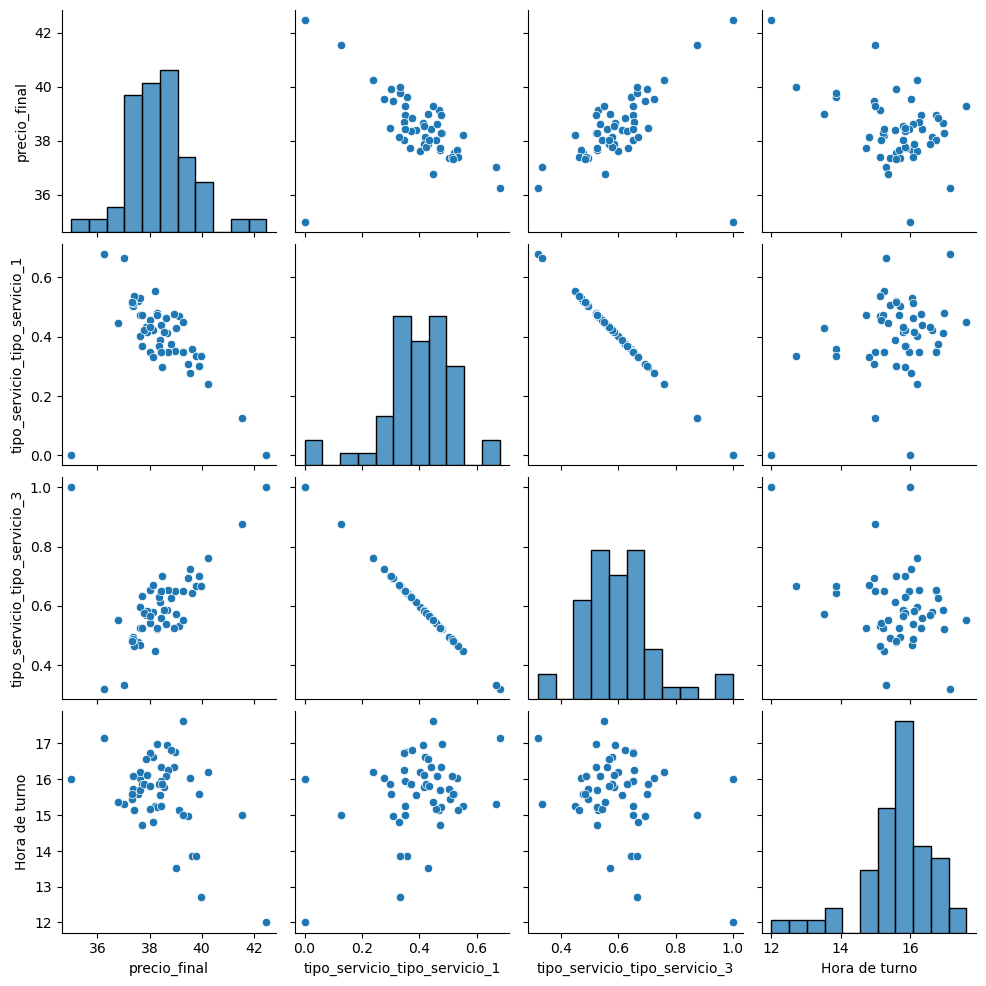

In [34]:
sns.pairplot(metricas_media.drop(['Semana'],axis=1))

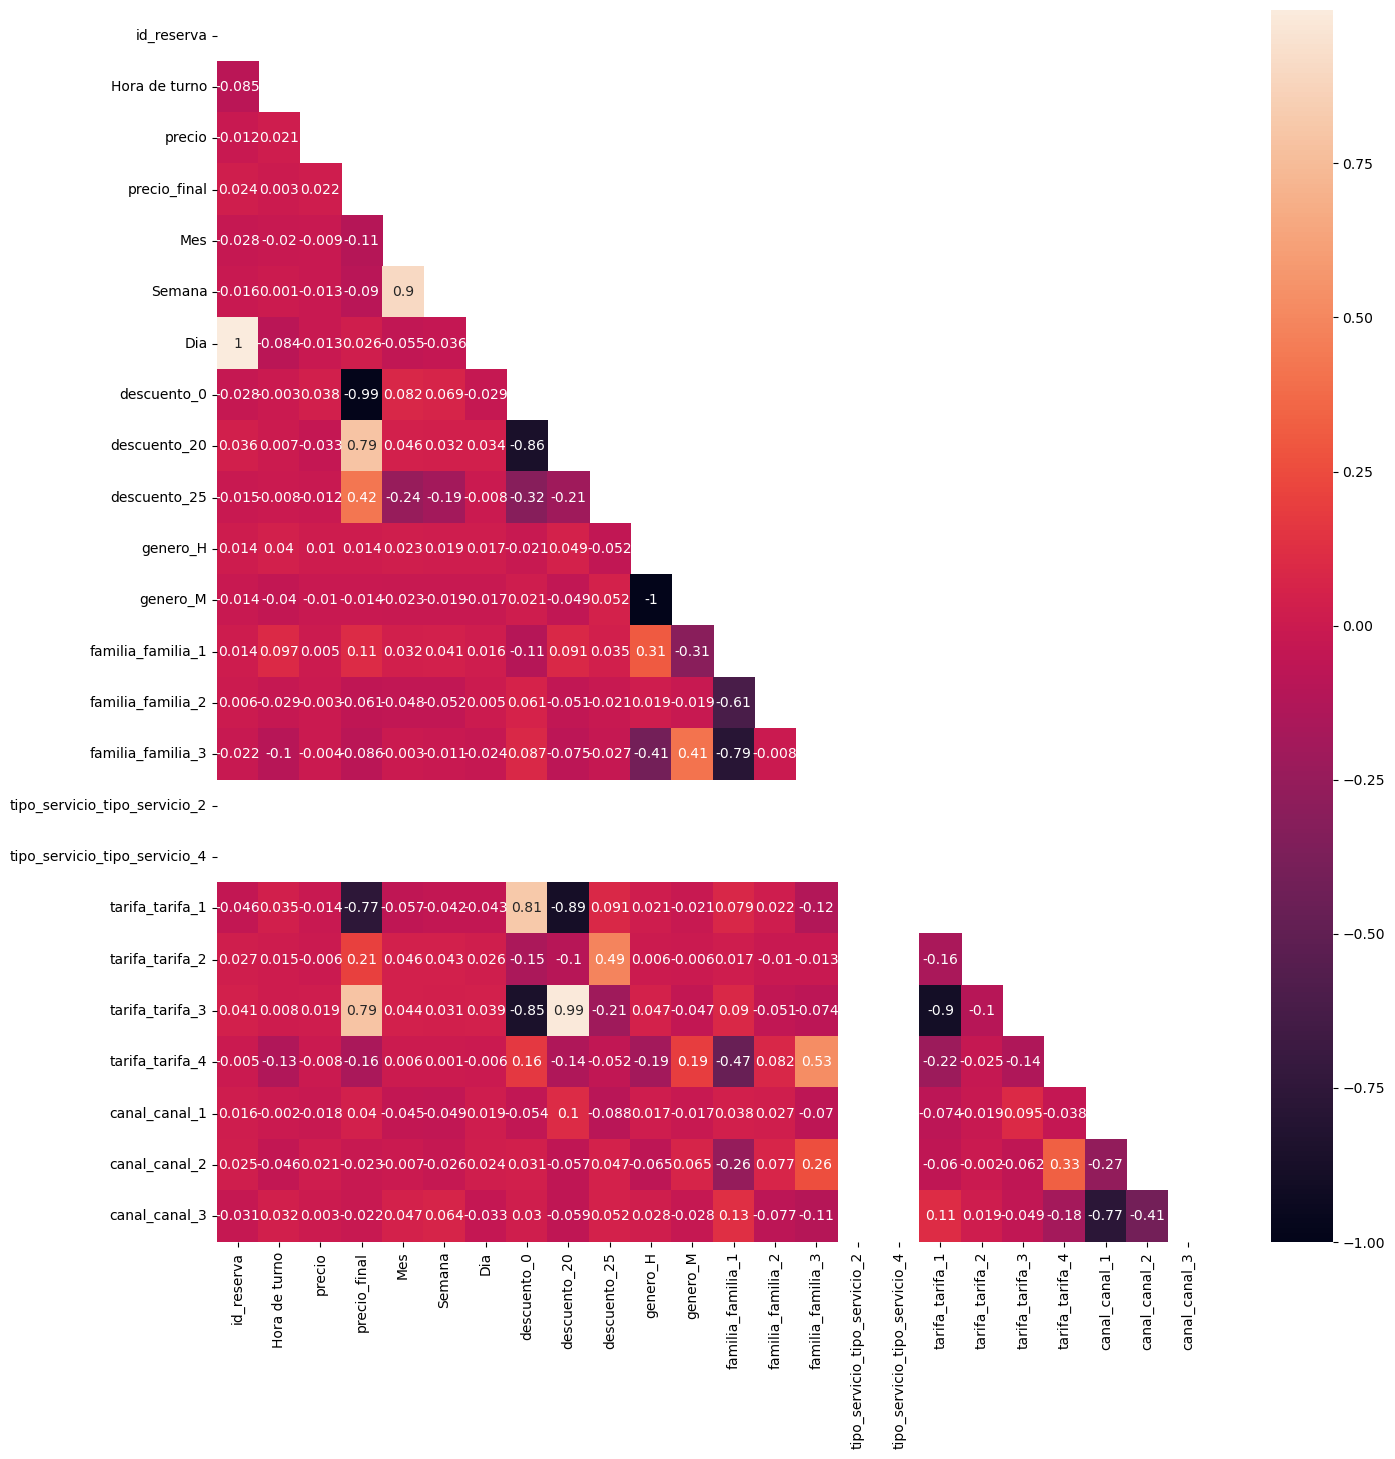

In [35]:
import numpy as np

df_corr = one_hot_encoded_data_2021.drop(['fecha_venta','Year','familia_familia_4','tipo_servicio_tipo_servicio_1','tipo_servicio_tipo_servicio_3'],axis=1).corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(3)
fig, ax = plt.subplots(figsize=(16,16))    
sns.heatmap(df_corr, annot=True,ax=ax)

In [36]:

one_hot_encoded_data_2021.columns


Index(['id_reserva', 'Día de semana de fecha_venta', 'Hora de turno',
       'cpais_id', 'provincia', 'fecha_venta', 'precio', 'precio_final',
       'Year', 'Mes', 'Semana', 'Dia', 'descuento_0', 'descuento_20',
       'descuento_25', 'genero_H', 'genero_M', 'familia_familia_1',
       'familia_familia_2', 'familia_familia_3', 'familia_familia_4',
       'tipo_servicio_tipo_servicio_1', 'tipo_servicio_tipo_servicio_2',
       'tipo_servicio_tipo_servicio_3', 'tipo_servicio_tipo_servicio_4',
       'tarifa_tarifa_1', 'tarifa_tarifa_2', 'tarifa_tarifa_3',
       'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2', 'canal_canal_3'],
      dtype='object')

In [37]:
one_hot_encoded_data_2021.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,cpais_id,provincia,fecha_venta,precio,precio_final,Year,Mes,...,tipo_servicio_tipo_servicio_2,tipo_servicio_tipo_servicio_3,tipo_servicio_tipo_servicio_4,tarifa_tarifa_1,tarifa_tarifa_2,tarifa_tarifa_3,tarifa_tarifa_4,canal_canal_1,canal_canal_2,canal_canal_3
5,6.0,viernes,20.0,Pais_1,PROVINCIA_2,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8.0,viernes,20.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,viernes,18.0,Pais_1,PROVINCIA_1,2021-01-01,35.0,35.0,2021.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
one_hot_encoded_data_2021_2 = pd.get_dummies(one_hot_encoded_data_2021, columns = ['Día de semana de fecha_venta','cpais_id','provincia','Hora de turno'])

In [39]:
one_hot_encoded_data_2021_2.columns

Index(['id_reserva', 'fecha_venta', 'precio', 'precio_final', 'Year', 'Mes',
       'Semana', 'Dia', 'descuento_0', 'descuento_20', 'descuento_25',
       'genero_H', 'genero_M', 'familia_familia_1', 'familia_familia_2',
       'familia_familia_3', 'familia_familia_4',
       'tipo_servicio_tipo_servicio_1', 'tipo_servicio_tipo_servicio_2',
       'tipo_servicio_tipo_servicio_3', 'tipo_servicio_tipo_servicio_4',
       'tarifa_tarifa_1', 'tarifa_tarifa_2', 'tarifa_tarifa_3',
       'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2', 'canal_canal_3',
       'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_

In [40]:
one_hot_encoded_data_2021_2.head()

,id_reserva,fecha_venta,precio,precio_final,Year,Mes,Semana,Dia,descuento_0,descuento_20,...,provincia_PROVINCIA_1,provincia_PROVINCIA_2,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0
5,6.0,2021-01-01,35.0,35.0,2021.0,1.0,53.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
6,7.0,2021-01-01,35.0,35.0,2021.0,1.0,53.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
7,8.0,2021-01-01,35.0,35.0,2021.0,1.0,53.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
8,9.0,2021-01-01,35.0,35.0,2021.0,1.0,53.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
9,10.0,2021-01-01,35.0,35.0,2021.0,1.0,53.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [41]:
from fbprophet import Prophet
one_hot_encoded_data_2021_3 = one_hot_encoded_data_2021_2
data = one_hot_encoded_data_2021_3

# prepare expected column names

data['ds']= data['fecha_venta']
data =  data.sort_values(['ds'],ascending=True)
data['y']=data['precio_final']

data = data.drop(['fecha_venta','precio_final'],axis=1).reset_index(drop=True)

data.head()


C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id_reserva,precio,Year,Mes,Semana,Dia,descuento_0,descuento_20,descuento_25,genero_H,...,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,ds,y
0,6.0,35.0,2021.0,1.0,53.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,2021-01-01,35.00
1,26.0,35.0,2021.0,1.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,2021-01-01,43.75
2,25.0,35.0,2021.0,1.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,2021-01-01,43.75
3,23.0,35.0,2021.0,1.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,2021-01-01,43.75
4,22.0,35.0,2021.0,1.0,53.0,1.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,2021-01-01,42.00


In [42]:
x_train = data[-1000:]
x_train.head()


,id_reserva,precio,Year,Mes,Semana,Dia,descuento_0,descuento_20,descuento_25,genero_H,...,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,ds,y
2729,1059.0,35.0,2021.0,10.0,40.0,4.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,2021-10-04,35.00
2730,1063.0,35.0,2021.0,10.0,40.0,4.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,2021-10-04,42.00
2731,1064.0,35.0,2021.0,10.0,40.0,4.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,2021-10-04,43.75
2732,1065.0,35.0,2021.0,10.0,40.0,4.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,2021-10-04,42.00
2733,1066.0,35.0,2021.0,10.0,40.0,4.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,2021-10-04,42.00


In [43]:
data.columns

Index(['id_reserva', 'precio', 'Year', 'Mes', 'Semana', 'Dia', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'p

In [44]:
x_train.shape

(1000, 48)

In [45]:
x_test = data[:-1000]
x_test.head()
x_test.shape

(2729, 48)

In [46]:
# define the model
model = Prophet(changepoint_prior_scale=0.05, interval_width=0.95,growth = 'linear',seasonality_mode = 'multiplicative', \
               yearly_seasonality=20, \
            weekly_seasonality=True, \
            daily_seasonality=True, \
            changepoint_range=0.9)

In [47]:
x_test.columns

Index(['id_reserva', 'precio', 'Year', 'Mes', 'Semana', 'Dia', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'p

In [48]:
for c in [ 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0']:
  print(c)
  model.add_regressor(name=c, prior_scale=None, standardize='auto', mode='additive')
    

descuento_0
descuento_20
descuento_25
genero_H
genero_M
familia_familia_1
familia_familia_2
familia_familia_3
familia_familia_4
tipo_servicio_tipo_servicio_1
tipo_servicio_tipo_servicio_2
tipo_servicio_tipo_servicio_3
tipo_servicio_tipo_servicio_4
tarifa_tarifa_1
tarifa_tarifa_2
tarifa_tarifa_3
tarifa_tarifa_4
canal_canal_1
canal_canal_2
canal_canal_3
Día de semana de fecha_venta_domingo
Día de semana de fecha_venta_jueves
Día de semana de fecha_venta_lunes
Día de semana de fecha_venta_martes
Día de semana de fecha_venta_miércoles
Día de semana de fecha_venta_sábado
Día de semana de fecha_venta_viernes
cpais_id_Pais_1
cpais_id_Pais_3
cpais_id_Pais_5
provincia_PROVINCIA_1
provincia_PROVINCIA_2
provincia_PROVINCIA_3
provincia_PROVINCIA_4
Hora de turno_10.0
Hora de turno_12.0
Hora de turno_14.0
Hora de turno_16.0
Hora de turno_18.0
Hora de turno_20.0


In [49]:
# fit the model
model.fit(data[['ds','y', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0']])

C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [50]:
# use the model to make a forecast
forecast = model.predict(x_test[['ds', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0']])
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  35.139641   34.740379   35.529566
1 2021-01-01  35.000262   34.620250   35.389423
2 2021-01-01  35.000262   34.599981   35.397679
3 2021-01-01  34.989959   34.648556   35.382161
4 2021-01-01  35.013323   34.658400   35.401770


In [51]:
x_test[['ds', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0','y']].head()

,ds,descuento_0,descuento_20,descuento_25,genero_H,genero_M,familia_familia_1,familia_familia_2,familia_familia_3,familia_familia_4,...,provincia_PROVINCIA_2,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,y
0,2021-01-01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,35.00
1,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,43.75
2,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,43.75
3,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,43.75
4,2021-01-01,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,42.00


In [52]:
forecast_data = pd.concat([forecast[[ 'yhat_upper','yhat_lower','yhat']],x_test['y'].reset_index(drop=True)],axis=1)
forecast_data.head()

,yhat_upper,yhat_lower,yhat,y
0,35.529566,34.740379,35.139641,35.00
1,35.389423,34.620250,35.000262,43.75
2,35.397679,34.599981,35.000262,43.75
3,35.382161,34.648556,34.989959,43.75
4,35.401770,34.658400,35.013323,42.00


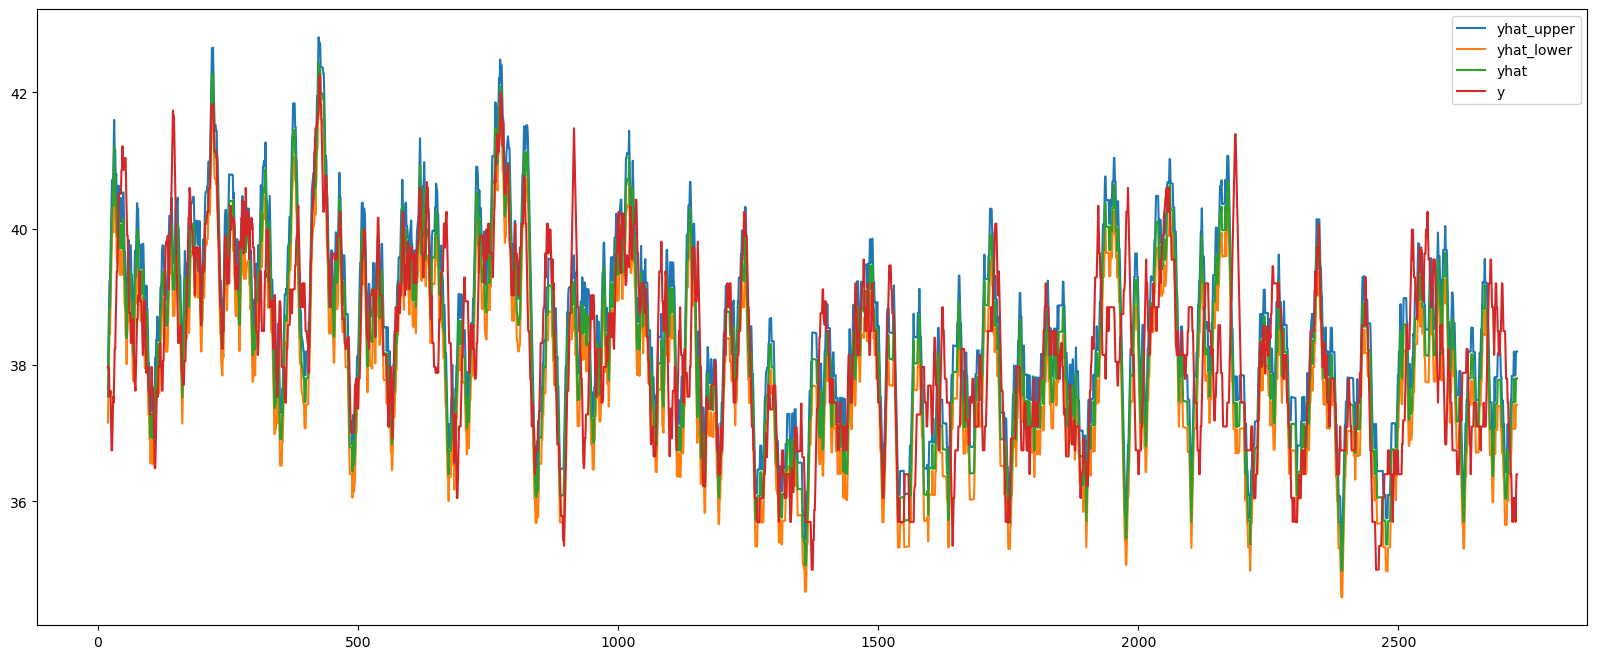

In [53]:
forecast_data.rolling(window=20).mean().plot(figsize=(20,8))

In [54]:
one_hot_encoded_data_2021_3=one_hot_encoded_data_2021_2.groupby(['fecha_venta','descuento_0', 'descuento_20', 'descuento_25',
       'genero_H', 'genero_M', 'familia_familia_1', 'familia_familia_2',
       'familia_familia_3', 'familia_familia_4',
       'tipo_servicio_tipo_servicio_1', 'tipo_servicio_tipo_servicio_2',
       'tipo_servicio_tipo_servicio_3', 'tipo_servicio_tipo_servicio_4',
       'tarifa_tarifa_1', 'tarifa_tarifa_2', 'tarifa_tarifa_3',
       'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2', 'canal_canal_3',
       'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0'])['id_reserva'].count().reset_index(name='total')
one_hot_encoded_data_2021_3.head()

,fecha_venta,descuento_0,descuento_20,descuento_25,genero_H,genero_M,familia_familia_1,familia_familia_2,familia_familia_3,familia_familia_4,...,provincia_PROVINCIA_2,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,total
0,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,4
1,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,2
2,2021-01-01,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,2021-01-01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,3
4,2021-01-01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2


In [55]:
data = one_hot_encoded_data_2021_3

# prepare expected column names

data['ds']= data['fecha_venta']
data =  data.sort_values(['ds'],ascending=True)
data['y']=data['total']

data = data.drop(['fecha_venta','total'],axis=1).reset_index(drop=True)

data.head()


,descuento_0,descuento_20,descuento_25,genero_H,genero_M,familia_familia_1,familia_familia_2,familia_familia_3,familia_familia_4,tipo_servicio_tipo_servicio_1,...,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,ds,y
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,2021-01-01,4
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,2021-01-01,2
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,2021-01-01,1
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,2021-01-01,3
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,2021-01-01,2


In [56]:

x_train = data[-800:]
x_train.head()


,descuento_0,descuento_20,descuento_25,genero_H,genero_M,familia_familia_1,familia_familia_2,familia_familia_3,familia_familia_4,tipo_servicio_tipo_servicio_1,...,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,ds,y
1033,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,2021-08-18,2
1034,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,2021-08-18,2
1035,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,2021-08-19,1
1036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,2021-08-19,1
1037,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,2021-08-19,1


In [57]:
x_test = data
x_test.head()
x_test.shape

(1833, 42)

In [58]:
# define the model
model = Prophet(changepoint_prior_scale=0.05, interval_width=0.95,growth = 'linear',seasonality_mode = 'multiplicative', \
               yearly_seasonality=20, \
            weekly_seasonality=True, \
            daily_seasonality=True, \
            changepoint_range=0.9)

In [59]:
x_test.columns

Index(['descuento_0', 'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.

In [60]:
for c in [ 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0']:
  print(c)
  model.add_regressor(name=c, prior_scale=None, standardize='auto', mode='additive')




descuento_0
descuento_20
descuento_25
genero_H
genero_M
familia_familia_1
familia_familia_2
familia_familia_3
familia_familia_4
tipo_servicio_tipo_servicio_1
tipo_servicio_tipo_servicio_2
tipo_servicio_tipo_servicio_3
tipo_servicio_tipo_servicio_4
tarifa_tarifa_1
tarifa_tarifa_2
tarifa_tarifa_3
tarifa_tarifa_4
canal_canal_1
canal_canal_2
canal_canal_3
Día de semana de fecha_venta_domingo
Día de semana de fecha_venta_jueves
Día de semana de fecha_venta_lunes
Día de semana de fecha_venta_martes
Día de semana de fecha_venta_miércoles
Día de semana de fecha_venta_sábado
Día de semana de fecha_venta_viernes
cpais_id_Pais_1
cpais_id_Pais_3
cpais_id_Pais_5
provincia_PROVINCIA_1
provincia_PROVINCIA_2
provincia_PROVINCIA_3
provincia_PROVINCIA_4
Hora de turno_10.0
Hora de turno_12.0
Hora de turno_14.0
Hora de turno_16.0
Hora de turno_18.0
Hora de turno_20.0


In [61]:

# fit the model
model.fit(data[['ds','y', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0']])



C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [62]:
# use the model to make a forecast
forecast = model.predict(x_test[['ds', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0']])
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\usuario\anaconda3\envs\trabajo\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

          ds      yhat  yhat_lower  yhat_upper
0 2021-01-01  2.471871    0.296396    4.649795
1 2021-01-01  2.449261    0.140214    4.858431
2 2021-01-01  2.305309    0.069370    4.432780
3 2021-01-01  2.138382    0.038389    4.179123
4 2021-01-01  2.557392    0.508280    4.810195


In [63]:
x_test[['ds', 'descuento_0',
       'descuento_20', 'descuento_25', 'genero_H', 'genero_M',
       'familia_familia_1', 'familia_familia_2', 'familia_familia_3',
       'familia_familia_4', 'tipo_servicio_tipo_servicio_1',
       'tipo_servicio_tipo_servicio_2', 'tipo_servicio_tipo_servicio_3',
       'tipo_servicio_tipo_servicio_4', 'tarifa_tarifa_1', 'tarifa_tarifa_2',
       'tarifa_tarifa_3', 'tarifa_tarifa_4', 'canal_canal_1', 'canal_canal_2',
       'canal_canal_3', 'Día de semana de fecha_venta_domingo',
       'Día de semana de fecha_venta_jueves',
       'Día de semana de fecha_venta_lunes',
       'Día de semana de fecha_venta_martes',
       'Día de semana de fecha_venta_miércoles',
       'Día de semana de fecha_venta_sábado',
       'Día de semana de fecha_venta_viernes', 'cpais_id_Pais_1',
       'cpais_id_Pais_3', 'cpais_id_Pais_5', 'provincia_PROVINCIA_1',
       'provincia_PROVINCIA_2', 'provincia_PROVINCIA_3',
       'provincia_PROVINCIA_4', 'Hora de turno_10.0', 'Hora de turno_12.0',
       'Hora de turno_14.0', 'Hora de turno_16.0', 'Hora de turno_18.0',
       'Hora de turno_20.0','y']].head()

,ds,descuento_0,descuento_20,descuento_25,genero_H,genero_M,familia_familia_1,familia_familia_2,familia_familia_3,familia_familia_4,...,provincia_PROVINCIA_2,provincia_PROVINCIA_3,provincia_PROVINCIA_4,Hora de turno_10.0,Hora de turno_12.0,Hora de turno_14.0,Hora de turno_16.0,Hora de turno_18.0,Hora de turno_20.0,y
0,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,4
1,2021-01-01,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,2
2,2021-01-01,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,2021-01-01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,3
4,2021-01-01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2


In [64]:
forecast_data = pd.concat([forecast[[ 'yhat_upper','yhat_lower','yhat']],x_test['y'].reset_index(drop=True)],axis=1)
forecast_data.head()


,yhat_upper,yhat_lower,yhat,y
0,4.649795,0.296396,2.471871,4
1,4.858431,0.140214,2.449261,2
2,4.432780,0.069370,2.305309,1
3,4.179123,0.038389,2.138382,3
4,4.810195,0.508280,2.557392,2


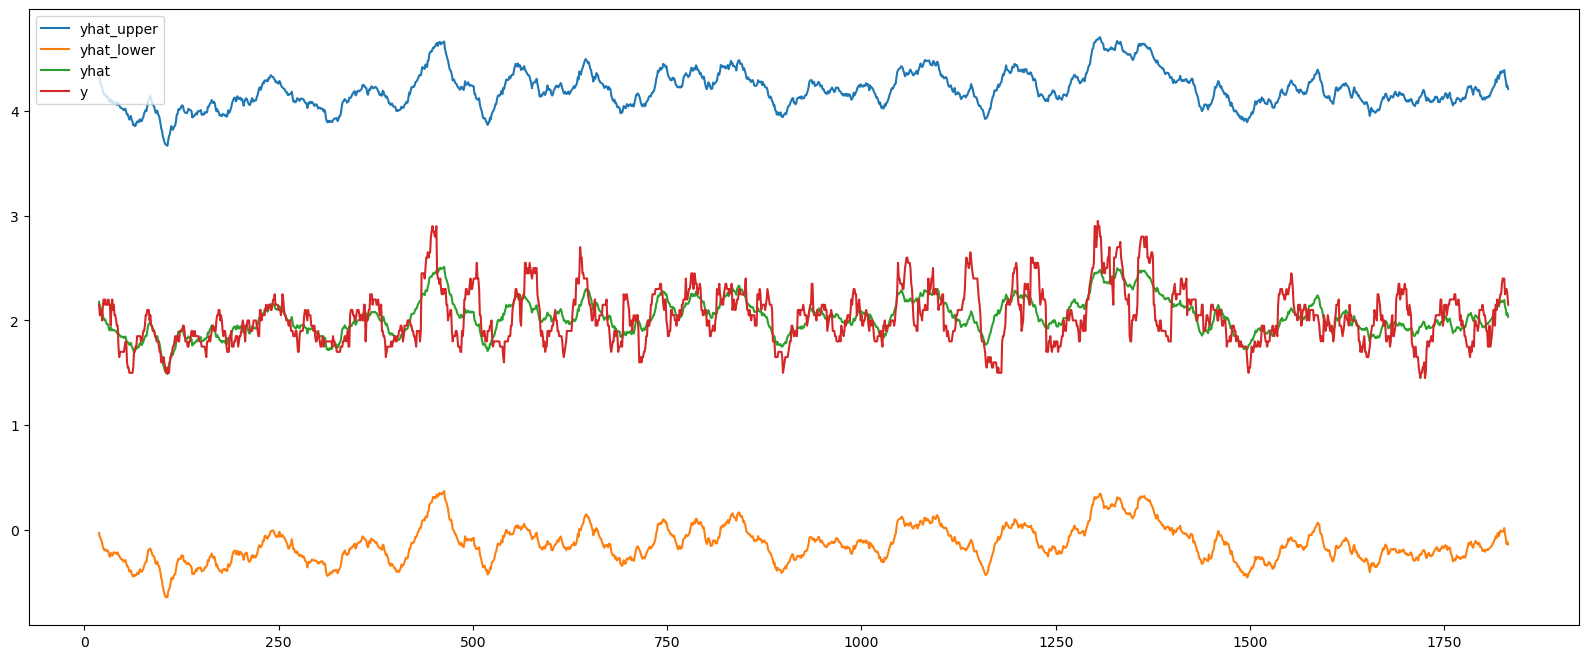

In [65]:

forecast_data.rolling(window=20).mean().plot(figsize=(20,8))

